Homework 4: Sentiment Analysis - Task 3
----

Names
----
Names: __Jalen Wu, Jonathan Zhang__ (Write these in every notebook you submit.)

Task 3: Train a Logistic Regression Model (20 points)
----

Using `sklearn`'s implementation of `LogisticRegression`, conduct a similar analysis on the performance of a Logistic Regression classifier on the provided data set.

Using the `time` module, you'll compare and contrast how long it takes your home-grown BoW vectorizing function vs. `sklearn`'s `CountVectorizer`.

Logistic regression is used for binary classification, but can be extended for multi-class classification

Read more about logistic regression here - https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/.

Recall from task 2 what binarized and multinomial mean here: a __binarized__ bag of words representation is one where we put 1 [true] if the word is there and 0 [false] otherwise, and a __multinomial__ bag of words representation is one where we put the count of the word if the word occurs, and 0 otherwise.

**10 points in Task 5 will be allocated for all 9 graphs (including the one generated here in Task 3 for Logistic Regression) being:**
- Legible
- Present below
- Properly labeled
     - x and y axes labeled
     - Legend for accuracy measures plotted
     - Plot Title with which model and run number the graph represents


In [1]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
import time
import sentiment_utils as sutils

[nltk_data] Downloading package punkt to /Users/jalenwu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)
train_tokens, train_labels = train_tups
dev_tokens, dev_labels = dev_tups

print(train_tups[0][0])
# some variables you may want to use
BINARIZED = False
USE_COUNT_VECTORIZER = False

['Van', 'Dien', 'must', 'cringe', 'with', 'embarrassment', 'at', 'the', 'memory', 'of', 'this', 'ludicrously', 'poor', 'film', ',', 'as', 'indeed', 'must', 'every', 'single', 'individual', 'involved', '.', 'To', 'be', 'honest', 'I', 'am', 'rather', 'embarrassed', 'to', 'admit', 'I', 'watched', 'it', 'from', 'start', 'to', 'finish', '.', 'Production', 'values', 'are', 'somewhere', 'between', 'the', 'original', 'series', 'of', "'Crossroads", "'", 'and', "'Prisoner", 'Cell', 'Block', 'H', "'", '.', 'Most', 'five', 'year', 'olds', 'would', 'be', 'able', 'to', 'come', 'up', 'with', 'more', 'realistic', 'dialogue', 'and', 'a', 'more', 'plausible', 'plot', '.', 'As', 'for', 'the', 'acting', 'performances', ',', 'if', 'you', 'can', 'imagine', 'the', 'most', 'rubbish', 'porno', 'you', 'have', 'ever', 'seen', '-', 'one', 'of', 'those', 'ones', 'where', 'the', 'action', 'is', 'padded', 'out', 'with', 'some', 'interminable', "'story", "'", 'to', 'explain', 'how', 'some', 'pouting', 'old', 'peroxid

In [3]:
# Write the functions needed (here or in sentiment_utils.py) to create vectorized BoW representations
# of your data. We recommend starting with a multinomial BoW representation.
# Each training example should be represented as a sparse vector.

def featurize(train_list):
    features = []
    for toks, label in train_list:
        if label == 1:
            for w in toks:
                if w not in features:
                    features.append(w)
    return features

def vectorize(X_train, features, binarized=False):
    # implement this function to featurize your data
    # use nltk.word_tokenize to tokenize the emails
    X = []

    sample_count = 0
    for toks in X_train:
        X.append([])
        for w in features:
            if binarized:
                if w in toks:
                    X[sample_count].append(1)
                else:
                    X[sample_count].append(0)
            else:
                X[sample_count].append(toks.count(w))
            
        sample_count += 1
    return X

In [4]:
# how much time does it take to featurize the all data with your implementation?

start = time.time()

train_list = list(zip(*train_tups))
feats = featurize(train_list)
X = vectorize(train_tokens, feats)
X_bin = vectorize(train_tokens, feats, binarized=True)

dev_list = list(zip(*dev_tups))
X_dev = vectorize(dev_tokens, feats)
X_dev_bin = vectorize(dev_tokens, feats, binarized=True)

end = time.time()
print("That took:", end - start, "seconds")

That took: 401.8273720741272 seconds


In [5]:
print(len(X_dev[0]))

20418


In [6]:
# how much time does it take to featurize the all data with sklearn's CountVectorizer?

start = time.time()
corpus = []
for toks in train_tokens:
    review = ""
    for tok in toks:
        review += tok +" "
    corpus.append(review)
    
vectorizer = CountVectorizer()
vectorizer_bin = CountVectorizer(binary=True)
X_vect = vectorizer.fit_transform(corpus).toarray()
X_vect_bin = vectorizer_bin.fit_transform(corpus).toarray()

X_dev_vect = vectorize(dev_tokens, vectorizer.get_feature_names_out())
X_dev_vect_bin = vectorize(dev_tokens, vectorizer_bin.get_feature_names_out(), binarized=True)

end = time.time()
print("That took:", end - start, "seconds")

That took: 56.094680070877075 seconds


In [7]:
len(X_bin[0])

20418

1. How big is your vocabulary using your vectorization function(s)? 20418
2. How big is your vocabulary using the `CountVectorizer`? 22596

In [8]:
#  write any code you need analyze the relative sparsity of your vectorized representations of the data

def count_zeros(X):
    num_zeros = 0
    for row in X:
        for val in row:
            if val == 0:
                num_zeros+=1
    return num_zeros

print(count_zeros(X)/(len(X)*len(X[0])))

# Print out the average % of entries that are zeros in each vector in the vectorized training data
print(count_zeros(X_vect)/(len(X_vect)*len(X_vect[0])))

0.993008099471055
0.9939459417596035


In [9]:

model = LogisticRegression()
if USE_COUNT_VECTORIZER:
    if BINARIZED:
        model.fit(X_vect_bin, train_labels)
        predictions = model.predict(X_dev_vect_bin)
    else: 
        model.fit(X_vect, train_labels)
        predictions = model.predict(X_dev_vect)
else: 
    if BINARIZED:
        model.fit(X_bin, train_labels)
        predictions = model.predict(X_dev_bin)
    else:
        model.fit(X, train_labels)
        predictions = model.predict(X_dev)

/Users/jalenwu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from nltk.metrics.scores import (precision, recall, f_measure, accuracy)


def get_pfra(predictions, dev_labels, verbose=False):
    if verbose:
        print(predictions)
        print(dev_labels)
    # set of indicies labelled 1
    refset_pos = set()
    testset_pos = set()
    for i in range(len(dev_labels)):
        if dev_labels[i] == 1:
            refset_pos.add(i)
        if predictions[i] == 1:
            testset_pos.add(i)
    return (precision(refset_pos, testset_pos), recall(refset_pos, testset_pos), f_measure(refset_pos, testset_pos), accuracy(dev_labels, predictions))


In [11]:
# Test the following 4 combinations to determine which has the best final f1 score for your Logistic Regression model:
model_mult = LogisticRegression()
model_vect_mult = LogisticRegression()
model_bin = LogisticRegression()
model_vect_bin = LogisticRegression()


# your vectorized features, multinomial
model_mult.fit(X, train_labels)
predictions = model_mult.predict(X_dev)

p, r, f, a = get_pfra(predictions, dev_labels)
print('f_measure:', f)

# CountVectorizer features, multinomial
model_vect_mult.fit(X_vect, train_labels)
predictions = model_vect_mult.predict(X_dev_vect)

p, r, f, a = get_pfra(predictions, dev_labels)
print('f_measure:', f)


/Users/jalenwu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f_measure: 0.7729468599033816


/Users/jalenwu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f_measure: 0.7887323943661972


In [12]:
# your vectorized features, binarized
model_bin.fit(X_bin, train_labels)
predictions = model_bin.predict(X_dev_bin)

p, r, f, a = get_pfra(predictions, dev_labels)
print('f_measure:', f)

# CountVectorizer features, binarized
model_vect_bin.fit(X_vect_bin, train_labels)
predictions = model_vect_bin.predict(X_dev_vect_bin)

p, r, f, a = get_pfra(predictions, dev_labels)
print('f_measure:', f)


f_measure: 0.8115942028985507
f_measure: 0.8037383177570093


Test the following 4 combinations to determine which has the best final f1 score for your Logistic Regression model:
- your vectorized features, multinomial: __0.7729468599033816__
- CountVectorizer features, multinomial: __0.7887323943661972__
- your vectorized features, binarized: __0.8115942028985507__
- CountVectorizer features, binarized: __0.8037383177570093__

Produce your graph(s) for the combination with the best final f1 score.




In [15]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)

training_data = []
for i in range(1, 11):
    end_index = int(len(X_bin) * i / 10)
    training_data.append((X_bin[:end_index], train_labels[:end_index]))


eval_data = []

i = 1
for feats, labels in training_data: # for each entry in the subset.
    model_bin.fit(feats, labels)
    predictions = model_bin.predict(X_dev_bin)
    
    prfa = get_pfra(predictions, dev_labels)
    print(f"PRFA Scores for {i * 10}% of training set: ", prfa)
    i += 1
    eval_data.append(prfa)

# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# NOTE : make sure one of your experiments uses 10% of the data, you will need this to answer the first question in task 5
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels

PRFA Scores for 10% of training set:  (0.7578947368421053, 0.6857142857142857, 0.72, 0.72)
PRFA Scores for 20% of training set:  (0.7959183673469388, 0.7428571428571429, 0.768472906403941, 0.765)
PRFA Scores for 30% of training set:  (0.7889908256880734, 0.819047619047619, 0.8037383177570093, 0.79)
PRFA Scores for 40% of training set:  (0.7837837837837838, 0.8285714285714286, 0.8055555555555556, 0.79)
PRFA Scores for 50% of training set:  (0.8173076923076923, 0.8095238095238095, 0.8133971291866028, 0.805)
PRFA Scores for 60% of training set:  (0.8058252427184466, 0.7904761904761904, 0.798076923076923, 0.79)
PRFA Scores for 70% of training set:  (0.8095238095238095, 0.8095238095238095, 0.8095238095238095, 0.8)
PRFA Scores for 80% of training set:  (0.7962962962962963, 0.819047619047619, 0.8075117370892019, 0.795)
PRFA Scores for 90% of training set:  (0.8316831683168316, 0.8, 0.8155339805825242, 0.81)
PRFA Scores for 100% of training set:  (0.8235294117647058, 0.8, 0.8115942028985507, 0

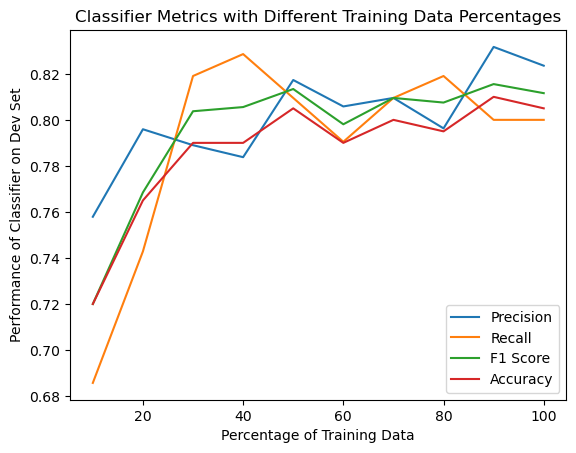

In [16]:
# x-axis: percentage of training data
# y-axis: performance of the classifier on the dev set
# 4 lines: precision, recall, f1, accuracy
import matplotlib.pyplot as plt


plt.plot([i for i in range(10, 101, 10)], [x[0] for x in eval_data], label="Precision")
plt.plot([i for i in range(10, 101, 10)], [x[1] for x in eval_data], label="Recall")
plt.plot([i for i in range(10, 101, 10)], [x[2] for x in eval_data], label="F1 Score")
plt.plot([i for i in range(10, 101, 10)], [x[3] for x in eval_data], label="Accuracy")

plt.legend()

plt.xlabel("Percentage of Training Data")
plt.ylabel("Performance of Classifier on Dev Set")
plt.title("Classifier Metrics with Different Training Data Percentages")
plt.show()